In [1]:
from keras.models import load_model
model = load_model('aumc_tcga_model.h5')

Using TensorFlow backend.


In [417]:
import os

jpg_path = 'HMAP_JPG/PIL_TCGA_Normal1'
jpg_list = []
for (path, dir, files) in os.walk(jpg_path):
    for filename in files:
        ext = os.path.splitext(filename)[-1]
        if ext == '.jpg':
            filePath = "{0}/{1}".format(path, filename)
            # print(filePath)
            jpg_list.append(filePath)

In [421]:
from matplotlib.image import imread

im_list = []

for filename in jpg_list:
    img = imread(filename)
    im_list.append(img)

In [422]:
import numpy as np

x = np.array(im_list)

from PIL import Image

# Resize Image
hmap_img = []
for n, img in enumerate(x):
    arr = Image.fromarray(img)
    res = arr.resize((128, 128))
    hmap_img.append(np.array(res))
    
hmap_img = np.array(hmap_img)

In [423]:
hmap_img = hmap_img / 255

In [424]:
pre = model.predict(hmap_img)

In [425]:
for predict in pre:
    print(predict)

[0.8361068  0.16389324]
[0.8361068  0.16389321]
[0.8361068  0.16389324]
[0.8361068  0.16389321]
[1.0000000e+00 2.4689064e-09]
[0.8361068  0.16389321]
[0.8361068  0.16389324]
[0.8361068  0.16389321]
[0.8361068  0.16389324]
[0.8361068  0.16389321]
[0.8361068  0.16389324]
[0.8361068  0.16389321]
[0.8361068  0.16389324]
[0.8361068  0.16389321]
[0.8907493  0.10925071]
[0.96018475 0.03981527]
[0.8361068  0.16389324]
[0.8361068  0.16389321]
[0.8361068  0.16389324]
[0.8361068  0.16389321]
[0.9962441 0.0037559]
[0.00482397 0.99517596]
[9.9997520e-01 2.4831885e-05]
[9.9963784e-01 3.6220279e-04]
[0.5091363  0.49086368]
[0.8361068  0.16389321]
[0.61814463 0.3818554 ]
[0.8361068  0.16389321]
[0.8361068  0.16389324]
[0.8361068  0.16389321]
[0.8361068  0.16389324]
[0.8361068  0.16389321]
[1.000000e+00 4.808378e-12]
[0.8361068  0.16389321]
[0.8361068  0.16389324]
[0.8361068  0.16389321]
[0.06498413 0.93501586]
[9.990589e-01 9.411416e-04]
[9.9957508e-01 4.2489776e-04]
[0.98207766 0.01792236]
[0.9164800

In [354]:
len(df) / 2

10.5

In [157]:
df = pd.read_csv('HMAP_JPG/asian_sort/heatmap_info.txt', '\t')

In [149]:
df['filename'][1]

'test_TCGA-04-1652-01A-01-BS1.fb25d8c5-3ac6-4783-a946-af40e87e504c_10_11.jpeg'

In [154]:
pre_list = []
am_list = []

for predict in pre:
    pre_list.append(predict)
    am_list.append('labels: ' + str(np.argmax(predict)))

In [155]:
app_df = pd.DataFrame(data={'predict': pre_list})
am_df = pd.DataFrame(data={'label': am_list})

In [158]:
df['predict'] = app_df

In [160]:
df['label'] = am_df

In [375]:
for predict in pre:
    print(np.argmax(predict))

0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
1
1
0
0
0
0
0
0
0
0
0
0
1
1
0
1
0
1
1
1
1
0
0
0
1
1
0
1
0
0
1
1
0
1
1
1
1
1
1
0
1
0
1
0
1
1
1
0
1
1
1
1
0
0
1
0
1
1
1
1
0
0
1
1
1
0
1
1
0
0
1
1
1
1
1
1
0
1
0
0
1
1
0
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
0
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
0
1
0
1
1
1
0
1
1
0
1
1
1
1
1
0
1
1
0
0
0
0
1
1
0
1
0
1
1
1
1
1
1
1
0
1
0
0
0
0
0
1
0
0
0
1
1
0
1
1
1
1
1
1
0
1
0
0
0
0
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
0
0
0
0
0
1
1
1
0
1
0
1
1
1
1
1
1
1
1
0
1
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
1
0
1
0
0
0
0
1
1
1
0
0
1
1
0
0
0
0
0
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
1
1
0
0
0
1
1
1
1
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0


In [165]:
line = '[0.12323 0.413213]'

line.split('[')[1]

'0.12323 0.413213]'

In [173]:
NumberOfClasses = len(prob)
class_all = []
sum_class = 0

for nC in range(1,NumberOfClasses):
    class_all.append(float(prob[nC]))
    sum_class = sum_class + float(prob[nC])
    
for nC in range(NumberOfClasses-1):
    class_all[nC] = class_all[nC] / sum_class
    current_score = max(class_all)

current_score

1.0

In [176]:
# from PIL import Image

arr = Image.fromarray(im)
re = arr.resize((1024, 1024))

In [426]:
new_img = []

for predict in pre:
    new_img.append(predict[1])

In [427]:
hmap_arr = np.array(new_img)

In [428]:
len(hmap_arr)

289

In [204]:
import seaborn as sns

In [429]:
hmap_mat = np.resize(hmap_arr, (17, 17))

In [343]:
df = pd.DataFrame(hmap_mat)

In [345]:
df.to_csv('heatmap.csv')

In [322]:
hmap_arr[7]

5.7195386e-05

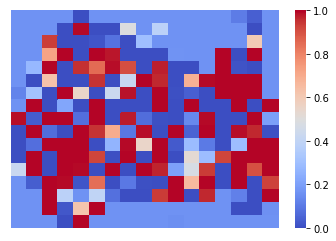

In [458]:
from matplotlib import colors

cmap = colors.ListedColormap(['white', 'blue', 'red'])
bounds=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

norm = colors.BoundaryNorm(bounds, cmap.N)
# heatmap = plt.pcolor(hmap_mat, cmap=cmap, norm=norm)

#plt.colorbar(heatmap, ticks=[0, 1, 2, 3])
#plt.imshow(hmap_mat, cmap='hot', interpolation='nearest')
sns.heatmap(hmap_mat, linewidths=0.1, cmap=sns.color_palette("coolwarm", 255), xticklabels='', yticklabels='', linecolor=None)
plt.show()

In [337]:
fig = plt.gcf()
fig.savefig('heatmap.png')

<Figure size 432x288 with 0 Axes>

([array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 19.]),
  array([ 3.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 17.]),
  array([ 5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 16.]),
  array([ 4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 16.]),
  array([ 6.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0., 14.]),
  array([ 6.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1., 13.]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 19.]),
  array([ 2.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  2., 15.]),
  array([ 5.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 15.]),
  array([ 7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
  array([ 5.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
  array([ 8.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.]),
  array([ 6.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
  array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 19.]),
  array([ 5.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1., 18.]),
  array([ 5.,  0.,  1., 

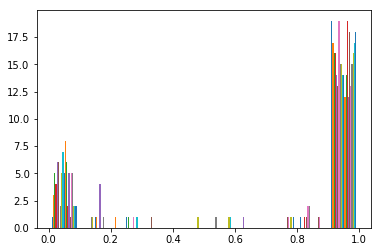

In [338]:
plt.hist(hmap_mat)